Dataset: <ahref> https://www.kaggle.com/c/fake-news/data# </ahref>

In [1]:
import pandas as pd

In [4]:
df = pd.read_csv('train.csv')

In [5]:
df.head()

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


In [6]:
#Getting the independent features

X = df.drop('label', axis=1)

In [7]:
X

,id,title,author,text
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ..."
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...
...,...,...,...,...
20795,20795,Rapper T.I.: Trump a ’Poster Child For White S...,Jerome Hudson,Rapper T. I. unloaded on black celebrities who...
20796,20796,"N.F.L. Playoffs: Schedule, Matchups and Odds -...",Benjamin Hoffman,When the Green Bay Packers lost to the Washing...
20797,20797,Macy’s Is Said to Receive Takeover Approach by...,Michael J. de la Merced and Rachel Abrams,The Macy’s of today grew from the union of sev...
20798,20798,"NATO, Russia To Hold Parallel Exercises In Bal...",Alex Ansary,"NATO, Russia To Hold Parallel Exercises In Bal..."


In [8]:
# Getting the independent feature 

y =df['label']

In [9]:
y

0        1
1        0
2        1
3        1
4        1
        ..
20795    0
20796    0
20797    0
20798    1
20799    1
Name: label, Length: 20800, dtype: int64

In [10]:
df.shape

(20800, 5)

In [11]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, HashingVectorizer

In [14]:
df.isna().sum()

id           0
title      558
author    1957
text        39
label        0
dtype: int64

In [15]:
df = df.dropna()

In [17]:
df.shape

(18285, 5)

In [21]:
messages = df.copy()

In [22]:
messages.reset_index(inplace= True)

In [23]:
messages.head(20)

,index,id,title,author,text,label
0,0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1
5,5,5,Jackie Mason: Hollywood Would Love Trump if He...,Daniel Nussbaum,"In these trying times, Jackie Mason is the Voi...",0
6,7,7,Benoît Hamon Wins French Socialist Party’s Pre...,Alissa J. Rubin,"PARIS — France chose an idealistic, traditi...",0
7,9,9,"A Back-Channel Plan for Ukraine and Russia, Co...",Megan Twohey and Scott Shane,A week before Michael T. Flynn resigned as nat...,0
8,10,10,Obama’s Organizing for Action Partners with So...,Aaron Klein,"Organizing for Action, the activist group that...",0
9,11,11,"BBC Comedy Sketch ""Real Housewives of ISIS"" Ca...",Chris Tomlinson,The BBC produced spoof on the “Real Housewives...,0


In [24]:
messages['title'][6]

'Benoît Hamon Wins French Socialist Party’s Presidential Nomination - The New York Times'

In [27]:
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
import re

ps = PorterStemmer()
corpus = []
for i in range (0,len(messages)):
    review = re.sub('[^a-zA-Z]',' ', messages['title'][i])
    review = review.lower()
    review = review.split()
    
    review = [ps.stem(word) for word in review if not word in stopwords.words('english') ]
    review = ' '.join(review)
    corpus.append(review)
    
    

In [ ]:
corpus

In [28]:
# Creating a bag of words
cv  = CountVectorizer(max_features = 5000, ngram_range=(1,3))
X = cv.fit_transform(corpus).toarray()

In [32]:
X.shape

(18285, 5000)

In [33]:
y = messages['label']

In [34]:
# Train and test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = .33, random_state=0) 

In [35]:
cv.get_feature_names()[:20]

['abandon',
 'abc',
 'abc news',
 'abduct',
 'abe',
 'abedin',
 'abl',
 'abort',
 'abroad',
 'absolut',
 'abstain',
 'absurd',
 'abus',
 'abus new',
 'abus new york',
 'academi',
 'accept',
 'access',
 'access pipelin',
 'access pipelin protest']

In [36]:
cv.get_params()

{'analyzer': 'word',
 'binary': False,
 'decode_error': 'strict',
 'dtype': numpy.int64,
 'encoding': 'utf-8',
 'input': 'content',
 'lowercase': True,
 'max_df': 1.0,
 'max_features': 5000,
 'min_df': 1,
 'ngram_range': (1, 3),
 'preprocessor': None,
 'stop_words': None,
 'strip_accents': None,
 'token_pattern': '(?u)\\b\\w\\w+\\b',
 'tokenizer': None,
 'vocabulary': None}

In [37]:
count_df = pd.DataFrame(X_train, columns=cv.get_feature_names())

In [38]:
count_df.head()

,abandon,abc,abc news,abduct,abe,abedin,abl,abort,abroad,absolut,...,zero,zika,zika viru,zionist,zone,zone new,zone new york,zoo,zu,zuckerberg
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [40]:
import matplotlib.pyplot as plt

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    See full source and example: 
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
    
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

<h2>MultinomialNB Algorithm</h2>

In [41]:
from sklearn.naive_bayes import MultinomialNB
classifier = MultinomialNB()

In [42]:
from sklearn import metrics
import numpy as np
import itertools

accuracy  : 0.901
Confusion matrix, without normalization


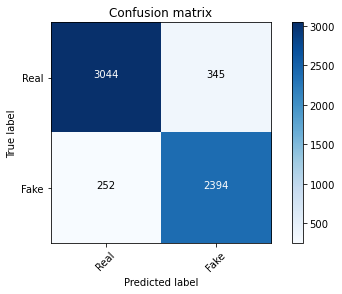

In [44]:
classifier.fit(X_train,y_train)
pred = classifier.predict(X_test)
score= metrics.accuracy_score(y_test,pred)
print("accuracy  : %.3f" % score)
cm = metrics.confusion_matrix(y_test,pred)
plot_confusion_matrix(cm, classes=['Real','Fake'])

<h2>Passive Aggeresive Classifier algorithm </h2>

In [48]:
from sklearn.linear_model import PassiveAggressiveClassifier
linear_clf = PassiveAggressiveClassifier(max_iter=50)

accuracy:   0.920
Confusion matrix, without normalization


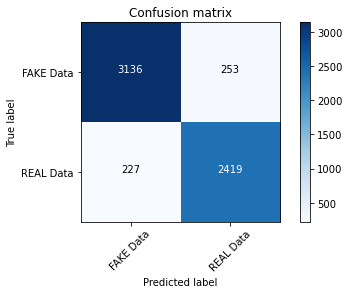

In [49]:
linear_clf.fit(X_train, y_train)
pred = linear_clf.predict(X_test)
score = metrics.accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % score)
cm = metrics.confusion_matrix(y_test, pred)
plot_confusion_matrix(cm, classes=['FAKE Data', 'REAL Data'])

<h2>Multinomial Classifier with Hyperparameter</h2>

In [50]:
classifier=MultinomialNB(alpha=0.1)

In [51]:

previous_score=0
for alpha in np.arange(0,1,0.1):
    sub_classifier=MultinomialNB(alpha=alpha)
    sub_classifier.fit(X_train,y_train)
    y_pred=sub_classifier.predict(X_test)
    score = metrics.accuracy_score(y_test, y_pred)
    if score>previous_score:
        classifier=sub_classifier
    print("Alpha: {}, Score : {}".format(alpha,score))

/opt/anaconda3/lib/python3.7/site-packages/sklearn/naive_bayes.py:512: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)


Alpha: 0.0, Score : 0.8906379453189727
Alpha: 0.1, Score : 0.9012427506213753
Alpha: 0.2, Score : 0.9015741507870754
Alpha: 0.30000000000000004, Score : 0.9015741507870754
Alpha: 0.4, Score : 0.9007456503728252
Alpha: 0.5, Score : 0.9005799502899752
Alpha: 0.6000000000000001, Score : 0.9015741507870754
Alpha: 0.7000000000000001, Score : 0.9019055509527755
Alpha: 0.8, Score : 0.9007456503728252
Alpha: 0.9, Score : 0.9009113504556753


In [52]:

## Get Features names
feature_names = cv.get_feature_names()

In [53]:
classifier.coef_[0]

array([ -9.10036605,  -8.6227385 ,  -9.10036605, ..., -10.79496178,
        -8.91464891,  -9.32862471])

In [54]:
### Most real
sorted(zip(classifier.coef_[0], feature_names), reverse=True)[:20]

[(-4.000126376264419, 'trump'),
 (-4.287849914102974, 'hillari'),
 (-4.396366840720952, 'clinton'),
 (-4.899946945868169, 'elect'),
 (-5.176575820557189, 'new'),
 (-5.2347075860082, 'comment'),
 (-5.273945400633064, 'video'),
 (-5.386793987777445, 'war'),
 (-5.396799073738407, 'us'),
 (-5.4119969346478385, 'hillari clinton'),
 (-5.417114653084819, 'fbi'),
 (-5.4806617042015136, 'vote'),
 (-5.566232695514838, 'email'),
 (-5.578216062401935, 'world'),
 (-5.633992599859346, 'obama'),
 (-5.734478675432337, 'donald'),
 (-5.763072474799078, 'donald trump'),
 (-5.785067496384624, 'russia'),
 (-5.846201884877992, 'day'),
 (-5.862087842466802, 'america')]

In [57]:
### Most fake
sorted(zip(classifier.coef_[0], feature_names))[:100000]

[(-10.79496177525616, 'abe'),
 (-10.79496177525616, 'abroad'),
 (-10.79496177525616, 'abus new'),
 (-10.79496177525616, 'abus new york'),
 (-10.79496177525616, 'act new'),
 (-10.79496177525616, 'act new york'),
 (-10.79496177525616, 'advic'),
 (-10.79496177525616, 'advis new'),
 (-10.79496177525616, 'advis new york'),
 (-10.79496177525616, 'afford care'),
 (-10.79496177525616, 'afford care act'),
 (-10.79496177525616, 'age new'),
 (-10.79496177525616, 'age new york'),
 (-10.79496177525616, 'agenda breitbart'),
 (-10.79496177525616, 'ail'),
 (-10.79496177525616, 'airbag'),
 (-10.79496177525616, 'aleppo new'),
 (-10.79496177525616, 'aleppo new york'),
 (-10.79496177525616, 'ali'),
 (-10.79496177525616, 'america breitbart'),
 (-10.79496177525616, 'america new york'),
 (-10.79496177525616, 'ami'),
 (-10.79496177525616, 'ami schumer'),
 (-10.79496177525616, 'amp'),
 (-10.79496177525616, 'ann'),
 (-10.79496177525616, 'ann coulter'),
 (-10.79496177525616, 'announc new'),
 (-10.79496177525616,